In [5]:
import numpy as np
import scipy.io
from scipy.stats import f_oneway, shapiro
import matplotlib.pyplot as plt

In [9]:
# Load MATLAB data
data = scipy.io.loadmat('Data_example3.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'alloy', 'strength'])

In [10]:
strength = data['strength']
alloy = data['alloy']

In [26]:
strength

array([[82, 86, 79, 83, 84, 85, 86, 87, 74, 82, 78, 75, 76, 77, 79, 79,
        77, 78, 82, 79]], dtype=uint8)

In [21]:
alloy

array([[array(['st'], dtype='<U2'), array(['st'], dtype='<U2'),
        array(['st'], dtype='<U2'), array(['st'], dtype='<U2'),
        array(['st'], dtype='<U2'), array(['st'], dtype='<U2'),
        array(['st'], dtype='<U2'), array(['st'], dtype='<U2'),
        array(['al1'], dtype='<U3'), array(['al1'], dtype='<U3'),
        array(['al1'], dtype='<U3'), array(['al1'], dtype='<U3'),
        array(['al1'], dtype='<U3'), array(['al1'], dtype='<U3'),
        array(['al2'], dtype='<U3'), array(['al2'], dtype='<U3'),
        array(['al2'], dtype='<U3'), array(['al2'], dtype='<U3'),
        array(['al2'], dtype='<U3'), array(['al2'], dtype='<U3')]],
      dtype=object)

In [34]:
np.arange(70, 90, 5)

array([70, 75, 80, 85])

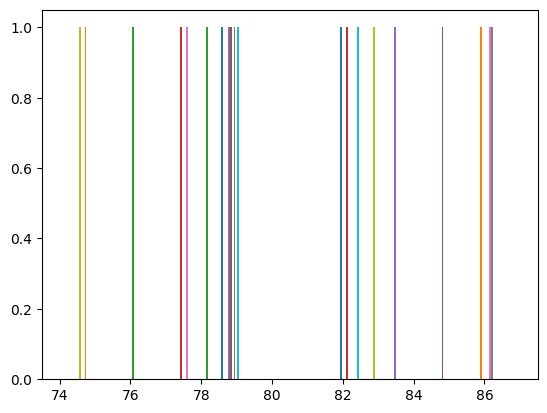

In [40]:
# Visualizzazione preliminare dei dati
plt.figure()
plt.hist(strength)
plt.show()

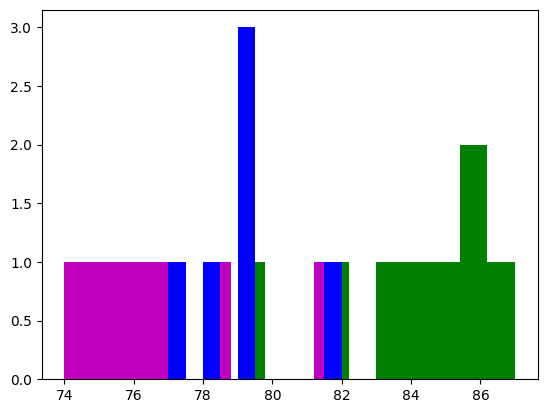

In [43]:
# Visualizzazione preliminare dei dati
plt.figure()
plt.hist(strength[alloy == 'st'], color = 'g')
plt.hist(strength[alloy == 'al1'], color = 'm')
plt.hist(strength[alloy == 'al2'], color = 'b')
plt.show()

In [44]:
# Test di normalità
_, p = shapiro(data['strength'])
p

0.3754662341272422

In [45]:
# Divido i tre gruppi

st = data['strength'][data['alloy'] == 'st']
al1 = data['strength'][data['alloy'] == 'al1']
al2 = data['strength'][data['alloy'] == 'al1']

mean_st = np.nanmean(st)
mean_al1 = np.nanmean(al1)
mean_al2 = np.nanmean(al2)
dev_st = np.nanstd(st)
dev_al1 = np.nanstd(al1)
dev_al2 = np.nanstd(al2)

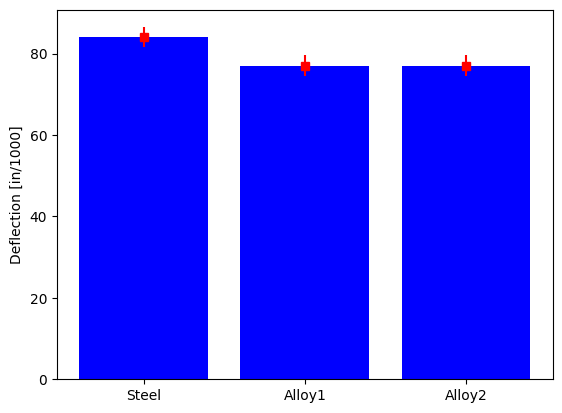

In [46]:
## Visualizzazione dei dati
plt.figure()
plt.bar([1, 2,3], [mean_st, mean_al1, mean_al2], color='blue')
plt.errorbar([1, 2,3], [mean_st, mean_al1, mean_al2], yerr=[dev_st,dev_al1, dev_al2], fmt='sr', markerfacecolor='red')
plt.xticks([1, 2,3], ['Steel','Alloy1','Alloy2'])
plt.ylabel('Deflection [in/1000]')
plt.show()

In [47]:
## Scegliere il test opportuno e formulare H0
_,p3= f_oneway(st,al1,al2)
p3

0.00014126842501452228

In [48]:
if p3 < 0.05: 
    print("Reject H0")
else: 
    print("Fail to reject H0")

Reject H0
